<h1>4. Crescimento de regiões</h1>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


<p>Algoritmo baseado em crescimeto de regiões que aplica uma semente em uma região de fundo branco e insere uma cor passada por referencia junto com as cordenadas ate os limites daquela área segmentando o objeto</p>

In [2]:
def pintar(a,li,ci,cor):
    import queue
    b=a.copy()
    q=queue.Queue()
    q.put(li)
    q.put(ci)
    while not q.empty():
        l=q.get()
        c=q.get()
        if all(b[l,c,:]==[255,255,255]):
            b[l,c]=cor
            q.put(l-1); q.put(c)
            q.put(l+1); q.put(c)
            q.put(l); q.put(c+1)
            q.put(l); q.put(c-1)
            
    return b;


<p>algoritmo mais complexo que o anterior, ele recebe as cordenadas da semente e cresce as regiões no final exindo somente as áreas segmentadas</p>

In [3]:
def get8n(x, y, shape):
    out = []
    maxx = shape[1]-1
    maxy = shape[0]-1
    
    #top left
    outx = min(max(x-1,0),maxx)
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))
    
    #top center
    outx = x
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))
    
    #top right
    outx = min(max(x+1,0),maxx)
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))
    
    #left
    outx = min(max(x-1,0),maxx)
    outy = y
    out.append((outx,outy))
    
    #right
    outx = min(max(x+1,0),maxx)
    outy = y
    out.append((outx,outy))
    
    #bottom left
    outx = min(max(x-1,0),maxx)
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))
    
    #bottom center
    outx = x
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))
    
    #bottom right
    outx = min(max(x+1,0),maxx)
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))
    
    return out

def region_growing(img, seed):
    seed_points = []
    outimg = np.zeros_like(img)
    seed_points.append((seed[0], seed[1]))
    processed = []
    while(len(seed_points) > 0):
        pix = seed_points[0]
        outimg[pix[0], pix[1]] = 255
        for coord in get8n(pix[0], pix[1], img.shape):
            if img[coord[0], coord[1]] != 0:
                outimg[coord[0], coord[1]] = 255
                if not coord in processed:
                    seed_points.append(coord)
                processed.append(coord)
        seed_points.pop(0)

    return outimg


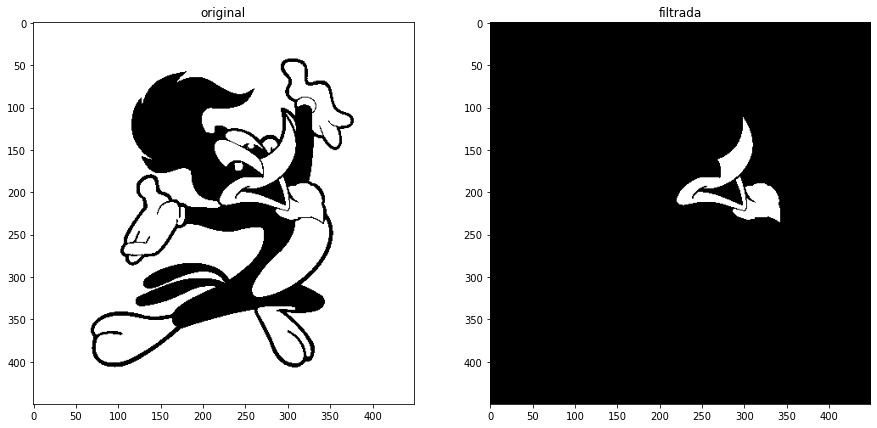

In [6]:
image = cv2.imread('imgs/picapau.jpg', 0)
ret, img = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

out = region_growing(img, [166, 287])

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.subplot(1,2,1).set_title('original')
plt.imshow(img, 'gray')
plt.subplot(1,2,2)
plt.subplot(1,2,2).set_title('filtrada')
plt.imshow(out, 'gray')

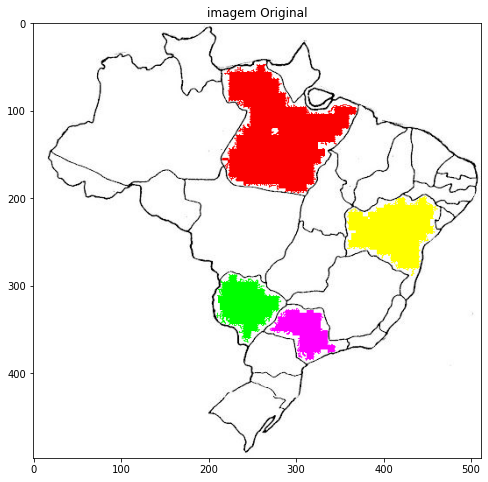

In [7]:
a = cv2.imread('imgs/mapa2.jpg', cv2.IMREAD_COLOR)
b = pintar(a,100,250,[250,0,0])
b = pintar(b,300,250,[0,255,0])
b = pintar(b,350,300,[255,0,255])
b = pintar(b,250,400,[255,255,0])

plt.figure(figsize=(12,8))
plt.title('imagem Original')
plt.imshow(b)